# Import libraries

In [12]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set default font to DejaVu Sans
rcParams['font.sans-serif'] = ['DejaVu Sans']

In [2]:
import pandas as pd 
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LassoCV, Ridge
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import friedmanchisquare
from sklearn.model_selection import KFold

# Import data

In [3]:
df_all=pd.read_csv('data_compiled.csv')
df_all.drop(['Unnamed: 0'],axis=1, inplace=True)
df_all=df_all.dropna()


In [4]:
other_features=['HR_Mean', 'HR_Max', 'HR_Std', 'HR_Skew', 'HR_Q1G',
       'HR_Q3G', 'EDA_Mean', 'EDA_Max', 'EDA_Std', 'EDA_Skew', 'EDA_Q1G',
       'EDA_Q3G', 'TEMP_Mean', 'TEMP_Max', 'TEMP_Std', 'TEMP_Skew', 'TEMP_Q1G',
       'TEMP_Q3G', 'ACC_Mean', 'ACC_Max', 'ACC_Std', 'ACC_Skew', 'ACC_Q1G',
       'ACC_Q3G', 'BVP_Mean', 'BVP_Max', 'BVP_Std', 'BVP_Skew', 'BVP_Q1G',
       'BVP_Q3G', 'PeakEDA', 'maxHRV', 'minHRV', 'medianHRV', 'SDNN', 'NN50',
       'pNN50', 'RMSSD', 'calories2hr', 'protien2hr', 'sugar2hr', 'carbs2hr',
       'protien8hr', 'sugar8hr', 'carbs8hr', 'calories24hr', 'protien24hr',
       'sugar24hr', 'carbs24hr', 'Eat', 'Eatcnt2hr', 'Eatcnt8hr', 'Eatcnt24hr',
       'Eatmean2hr', 'Eatmean8hr', 'Eatmean24hr', 'Minfrommid', 'Hourfrommid',
       'EDA_Min', 'calories8hr', 'TEMP_Min', 'BVP_Min', 'ACC_Min', 'HR_Min',
       'HR_Mean_Historical', 'HR_Std_Historical', 'ACC_Mean_Historical',
       'ACC_Std_Historical', 'Activity_Bouts', 'Activity24',
       'Activity1h']

In [5]:
all_sleep_features=['total_sleep_time','percent_time_asleep','waso','sleep_onset_latency',
                    'number_wake_bouts', 'stage_0_count','stage_2_count','stage_3_count',
                    'stage_5_count','stage_0_count_log','total_sleep_time_log',
                    'percent_time_asleep_log','stage_0_count_boxcox','stage_0_count_yeojohnson',
                    'stage_0_count_rank','stage_0_count_standardized','total_sleep_timelog',
                    'percent_time_asleeplog','wasolog','sleep_onset_latencylog','number_wake_boutslog',
                    'stage_0_countlog','stage_1_countlog','stage_2_countlog','stage_3_countlog','stage_5_countlog',
                    'total_sleep_time_boxcox','total_sleep_time_yeojohnson','total_sleep_time_rank','percent_time_asleep_boxcox',
                    'percent_time_asleep_yeojohnson','percent_time_asleep_rank','waso_boxcox','waso_yeojohnson','waso_rank',
                    'sleep_onset_latency_yeojohnson','sleep_onset_latency_rank','number_wake_bouts_boxcox','number_wake_bouts_yeojohnson',
                    'number_wake_bouts_rank','stage_1_count_boxcox','stage_1_count_yeojohnson','stage_1_count_rank','stage_2_count_boxcox',
                    'stage_2_count_yeojohnson','stage_2_count_rank','stage_3_count_boxcox','stage_3_count_yeojohnson','stage_3_count_rank',
                    'stage_5_count_boxcox','stage_5_count_yeojohnson','stage_5_count_rank','stage_0_count_percent','stage_1_count_percent',
                    'stage_2_count_percent','stage_3_count_percent','stage_5_count_percent','stage_1_count_percent_diff_from_recommended',
                    'stage_2_count_percent_diff_from_recommended','stage_3_count_percent_diff_from_recommended',
                    'stage_5_count_percent_diff_from_recommended']

Let us use only the selected transformed features 
the table defining them is given here
| Feature                          | Original | Log Transformation | Box-Cox Transformation | Yeo-Johnson Transformation | Rank-Based Inverse Normal Transformation |
|----------------------------------|----------|---------------------|------------------------|----------------------------|------------------------------------------|
| total_sleep_time                 | ✖        | ✔                   | ✖                      | ✖                          | ✔                                        |
| percent_time_asleep              | ✖        | ✔                   | ✖                      | ✖                          | ✔                                        |
| waso                             | ✔        | ✖                   | ✖                      | ✖                          | ✖                                        |
| sleep_onset_latency              | ✖        | ✖                   | ✖                      | ✖                          | ✔                                        |
| number_wake_bouts                | ✔        | ✖                   | ✖                      | ✖                          | ✖                                        |
| stage_0_count                    | ✖        | ✖                   | ✖                      | ✖                          | ✔                                        |
| stage_1_count                    | ✖        | ✖                   | ✖                      | ✖                          | ✔                                        |
| stage_2_count                    | ✖        | ✖                   | ✖                      | ✖                          | ✔                                        |
| stage_3_count                    | ✖        | ✖                   | ✖                      | ✔                          | ✖                                        |
| stage_5_count                    | ✖        | ✖                   | ✖                      | ✔                          | ✖                                        |

In [6]:
transformed_sleep_features=['waso','number_wake_bouts','stage_0_count_log','total_sleep_time_log',
                    'percent_time_asleep_log', 'total_sleep_timelog', 'percent_time_asleeplog','total_sleep_time_rank',
                    'percent_time_asleep_rank','sleep_onset_latency_rank','stage_1_count_rank','stage_3_count_yeojohnson',
                    'stage_2_count_rank','stage_3_count_rank','stage_5_count_yeojohnson','stage_0_count_percent','stage_1_count_percent',
                    'stage_2_count_percent','stage_3_count_percent','stage_5_count_percent','stage_1_count_percent_diff_from_recommended',
                    'stage_2_count_percent_diff_from_recommended','stage_3_count_percent_diff_from_recommended',
                    'stage_5_count_percent_diff_from_recommended']

In [7]:
unmodified_sleep_features= ['total_sleep_time','percent_time_asleep','waso','sleep_onset_latency',
                    'number_wake_bouts', 'stage_0_count','stage_2_count','stage_3_count',
                    'stage_5_count']

In [8]:
feature_sets = {
    'other_features': other_features,
    'other_features + unmodified_sleep_features': other_features + unmodified_sleep_features,
    'other_features + transformed_sleep_features': other_features + transformed_sleep_features,
    'other_features + all_sleep_features': other_features + all_sleep_features
}

# Perform Classification and save the results

In [ ]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import shap
import matplotlib.pyplot as plt

# Define models
models = {
    'DT': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'RF': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBOOST': XGBClassifier()
}

# Define feature sets
feature_sets = {
    'other_features': other_features,
    'other_features + unmodified_sleep_features': other_features + unmodified_sleep_features,
    'other_features + transformed_sleep_features': other_features + transformed_sleep_features,
    'other_features + all_sleep_features': other_features + all_sleep_features
}

# Balancing the dataset
def balance_classes(df, target):
    class_counts = df[target].value_counts()
    min_class_count = class_counts.min()
    
    balanced_df = df.groupby(target).apply(lambda x: x.sample(min_class_count)).reset_index(drop=True)
    return balanced_df

# Balance the entire dataset once
balanced_df = balance_classes(df_all, 'glucose_level')

# Encode the target labels
label_encoder = LabelEncoder()
balanced_df['glucose_level'] = label_encoder.fit_transform(balanced_df['glucose_level'])

results = []
kf = KFold(n_splits=10, shuffle=True, random_state=42)
shap_values_dict = {'low': {}, 'normal': {}, 'high': {}, 'cumulative': {}}

# Create a directory for saving SHAP plots
if not os.path.exists('shap_values'):
    os.makedirs('shap_values')

# Outer loop for each model
for name, model in tqdm(models.items(), desc='Models', position=1, leave=False):
    for set_name, feature_set in feature_sets.items():
        X_subset = balanced_df[feature_set]
        y = balanced_df['glucose_level']
        
        accuracies = []
        shap_values_combined = {'low': [], 'normal': [], 'high': [], 'cumulative': []}
        for fold, (train_index, test_index) in enumerate(tqdm(kf.split(X_subset), desc=f'{name} - {set_name} Folds', leave=False, position=0, total=kf.get_n_splits()), 1):
            X_train, X_test = X_subset.iloc[train_index], X_subset.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            acc = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            cm = confusion_matrix(y_test, y_pred)
            accuracies.append(acc)

            results.append({
                'Model': name,
                'Feature Set': set_name,
                'Fold': fold,
                'Accuracy': acc,
                'F1 Score': f1,
                'Precision': precision,
                'Recall': recall,
                'Confusion Matrix': cm
            })
            """
            # SHAP analysis
            explainer = shap.Explainer(model, X_train)
            shap_values = explainer(X_test)
            high_class_indices = np.where(y_test == label_encoder.transform(['High']))[0]
            low_class_indices = np.where(y_test == label_encoder.transform(['Low']))[0]
            normal_class_indices = np.where(y_test == label_encoder.transform(['Normal']))[0]

            shap_values_high = shap_values[high_class_indices] if len(high_class_indices) > 0 else None
            shap_values_low = shap_values[low_class_indices] if len(low_class_indices) > 0 else None
            shap_values_normal = shap_values[normal_class_indices] if len(normal_class_indices) > 0 else None

            if shap_values_high is not None:
                shap_values_combined['high'].extend(shap_values_high.values)
            if shap_values_low is not None:
                shap_values_combined['low'].extend(shap_values_low.values)
            if shap_values_normal is not None:
                shap_values_combined['normal'].extend(shap_values_normal.values)
            shap_values_combined['cumulative'].extend(shap_values.values)
            
            # Plot SHAP values for this fold
            for key, shap_val in zip(['high', 'low', 'normal', 'cumulative'],
                                     [shap_values_high, shap_values_low, shap_values_normal, shap_values]):
                if shap_val is not None and shap_val.shape[0] > 0:
                    plt.figure()
                    shap.summary_plot(shap_val, X_test, show=False)
                    plt.title(f'SHAP Summary Plot for {name} - {set_name} ({key} class) Fold {fold}')
                    plt.savefig(f'shap_values/{name}_{set_name}_{key}_class_fold_{fold}_shap_summary_plot.png')
                    plt.close()
                    """

        mean_acc = np.mean(accuracies)
        std_acc = np.std(accuracies)
        accuracies = []
        print(f'Average Accuracy for {name} on {set_name}: {mean_acc:.4f} ± {std_acc:.4f}')
        """
        # Store SHAP values
        for key in shap_values_combined.keys():
            if f'{name} - {set_name}' not in shap_values_dict[key]:
                shap_values_dict[key][f'{name} - {set_name}'] = []
            shap_values_dict[key][f'{name} - {set_name}'].extend(shap_values_combined[key])
            """

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Calculate mean and standard deviation for Accuracy
acc_metrics = results_df.groupby(['Model', 'Feature Set'])['Accuracy'].agg(['mean', 'std'])

# Print the average Accuracy ± STD for each model and feature set
print("\nAverage Accuracy ± STD for each model and feature set:")
for idx, row in acc_metrics.iterrows():
    print(f"{idx[0]} - {idx[1]}: {row['mean']:.4f} ± {row['std']:.4f}")

# Save the results to a CSV file
results_df.to_csv('model_performance_metrics_classification.csv', index=False)

print("Model performance metrics have been saved to 'model_performance_metrics_classification.csv'.")


Average Accuracy for DT on other_features: 0.6992 ± 0.0307


Average Accuracy for DT on other_features + unmodified_sleep_features: 0.7265 ± 0.0204


Average Accuracy for DT on other_features + transformed_sleep_features: 0.7305 ± 0.0200


                                                                                               
Models:  14%|█▍        | 1/7 [00:28<02:51, 28.60s/it]

Average Accuracy for DT on other_features + all_sleep_features: 0.7312 ± 0.0216


Average Accuracy for SVM on other_features: 0.3569 ± 0.0165


Average Accuracy for SVM on other_features + unmodified_sleep_features: 0.3569 ± 0.0165


SVM - other_features + transformed_sleep_features Folds:  10%|█         | 1/10 [00:35<05:16, 35.17s/it]

In [14]:
acc_metrics = results_df.groupby(['Model', 'Feature Set'])['Accuracy'].agg(['mean', 'std'])

In [15]:
print("\nAverage Accuracy ± STD for each model and feature set:")
for idx, row in acc_metrics.iterrows():
    print(f"{idx[0]} - {idx[1]}: {row['mean']:.4f} ± {row['std']:.4f}")


Average Accuracy ± STD for each model and feature set:
AdaBoost - other_features: 0.5189 ± 0.0170
AdaBoost - other_features + all_sleep_features: 0.5151 ± 0.0262
AdaBoost - other_features + transformed_sleep_features: 0.5171 ± 0.0252
AdaBoost - other_features + unmodified_sleep_features: 0.5068 ± 0.0166
DT - other_features: 0.7149 ± 0.0203
DT - other_features + all_sleep_features: 0.7513 ± 0.0122
DT - other_features + transformed_sleep_features: 0.7507 ± 0.0152
DT - other_features + unmodified_sleep_features: 0.7524 ± 0.0095
KNN - other_features: 0.3895 ± 0.0251
KNN - other_features + all_sleep_features: 0.3995 ± 0.0245
KNN - other_features + transformed_sleep_features: 0.3905 ± 0.0249
KNN - other_features + unmodified_sleep_features: 0.3995 ± 0.0241
LogisticRegression - other_features: 0.3281 ± 0.0099
LogisticRegression - other_features + all_sleep_features: 0.3286 ± 0.0091
LogisticRegression - other_features + transformed_sleep_features: 0.3281 ± 0.0099
LogisticRegression - other_fe

In [16]:
from scipy.stats import friedmanchisquare

In [19]:
pivot_table = results_df.pivot_table(index=['Model', 'Feature Set'], values='Accuracy', aggfunc=list).reset_index()

In [20]:
pivot_table

,Model,Feature Set,Accuracy
0,AdaBoost,other_features,"[0.5397727272727273, 0.5042613636363636, 0.490..."
1,AdaBoost,other_features + all_sleep_features,"[0.546875, 0.4815340909090909, 0.4850640113798..."
2,AdaBoost,other_features + transformed_sleep_features,"[0.5497159090909091, 0.4786931818181818, 0.487..."
3,AdaBoost,other_features + unmodified_sleep_features,"[0.5184659090909091, 0.484375, 0.4751066856330..."
4,DT,other_features,"[0.7414772727272727, 0.7173295454545454, 0.719..."
5,DT,other_features + all_sleep_features,"[0.7627840909090909, 0.7599431818181818, 0.732..."
6,DT,other_features + transformed_sleep_features,"[0.765625, 0.7485795454545454, 0.7425320056899..."
7,DT,other_features + unmodified_sleep_features,"[0.7670454545454546, 0.7443181818181818, 0.743..."
8,KNN,other_features,"[0.4147727272727273, 0.40625, 0.39829302987197..."
9,KNN,other_features + all_sleep_features,"[0.43323863636363635, 0.4119318181818182, 0.41..."


 # statistical significance of differences

In [32]:
pivot_table = results_df.pivot_table(index=['Model', 'Feature Set', 'Fold'], values='Accuracy').reset_index()


In [33]:
accuracy_lists = pivot_table.groupby(['Model', 'Feature Set'])['Accuracy'].apply(list).tolist()

In [35]:
# Perform Friedman test
stat, p = friedmanchisquare(*accuracy_lists)
print(f'Friedman test statistic: {stat}, p-value: {p}')

Friedman test statistic: 264.23336998350743, p-value: 8.791911217234021e-41


In [38]:
# Prepare data for post-hoc test
# Expand the accuracy lists into individual rows
expanded_df = pivot_table.explode('Accuracy')

# Create a pivot table suitable for the post-hoc test
posthoc_pivot = expanded_df.pivot_table(index='Fold', columns=['Model', 'Feature Set'], values='Accuracy', aggfunc='mean')


In [41]:
posthoc_pivot

Model             AdaBoost                                      \
Feature Set other_features other_features + all_sleep_features   
Fold                                                             
1                 0.539773                            0.546875   
2                 0.504261                            0.481534   
3                 0.490754                            0.485064   
4                 0.520626                            0.529161   
5                 0.499289                            0.496444   
6                 0.522048                            0.490754   
7                 0.530583                            0.519203   
8                 0.533428                            0.510669   
9                 0.510669                            0.537696   
10                0.537696                            0.553343   

Model                                                    \
Feature Set other_features + transformed_sleep_features   
Fold                                                      
1                                              0.549716   
2                                              0.478693   
3                                              0.487909   
4                                              0.529161   
5                                              0.507824   
6                                              0.499289   
7                                              0.537696   
8                                              0.510669   
9                                              0.516358   
10                                             0.553343   

Model                                                              DT  \
Feature Set other_features + unmodified_sleep_features other_features   
Fold                                                                    
1                                             0.518466       0.741477   
2                                             0.484375       0.717330   
3                                             0.475107       0.719772   
4                                             0.514936       0.739687   
5                                             0.514936       0.699858   
6                                             0.506401       0.685633   
7                                             0.506401       0.687055   
8                                             0.516358       0.705548   
9                                             0.500711       0.716927   
10                                            0.530583       0.735420   

Model                                            \
Feature Set other_features + all_sleep_features   
Fold                                              
1                                      0.762784   
2                                      0.759943   
3                                      0.732575   
4                                      0.751067   
5                                      0.753912   
6                                      0.743954   
7                                      0.731152   
8                                      0.755334   
9                                      0.768137   
10                                     0.753912   

Model                                                    \
Feature Set other_features + transformed_sleep_features   
Fold                                                      
1                                              0.765625   
2                                              0.748580   
3                                              0.742532   
4                                              0.753912   
5                                              0.732575   
6                                              0.733997   
7                                              0.735420   
8                                              0.779516   
9                                              0.759602   
10                                             0.75

In [44]:
melted_df = results_df.melt(id_vars=['Model', 'Feature Set', 'Fold'], 
                            value_vars=['Accuracy', 'F1 Score', 'Precision', 'Recall'], 
                            var_name='Metric', 
                            value_name='Value')


In [45]:
melted_df

,Model,Feature Set,Fold,Metric,Value
0,DT,other_features,1,Accuracy,0.741477
1,DT,other_features,2,Accuracy,0.717330
2,DT,other_features,3,Accuracy,0.719772
3,DT,other_features,4,Accuracy,0.739687
4,DT,other_features,5,Accuracy,0.699858
...,...,...,...,...,...
1115,XGBOOST,other_features + all_sleep_features,6,Recall,0.817923
1116,XGBOOST,other_features + all_sleep_features,7,Recall,0.825036
1117,XGBOOST,other_features + all_sleep_features,8,Recall,0.836415
1118,XGBOOST,other_features + all_sleep_features,9,Recall,0.829303


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

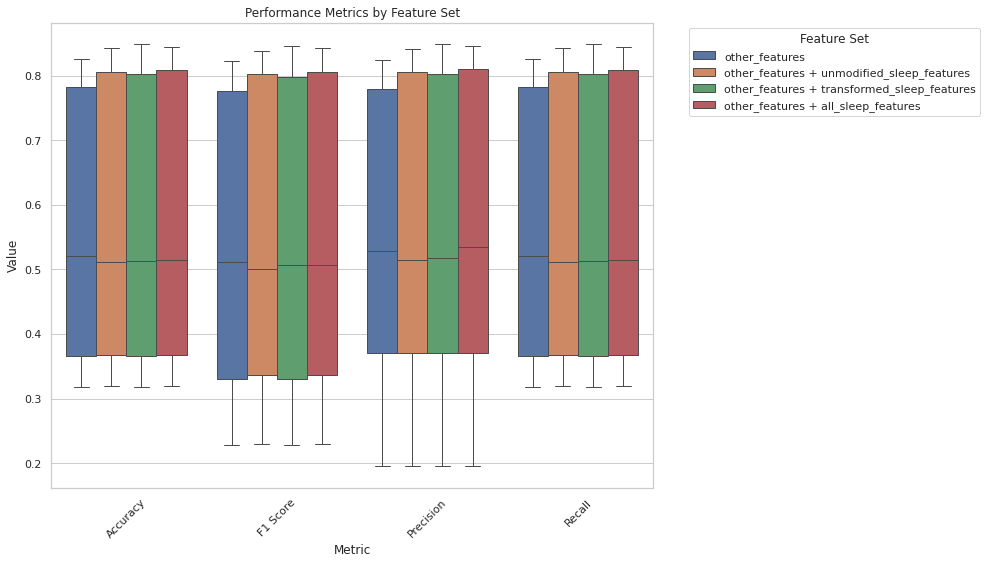

In [47]:
# Set the plot style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Metric', y='Value', hue='Feature Set', data=melted_df)

# Add a title and labels
plt.title('Performance Metrics by Feature Set')
plt.xlabel('Metric')
plt.ylabel('Value')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Display the legend
plt.legend(title='Feature Set', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

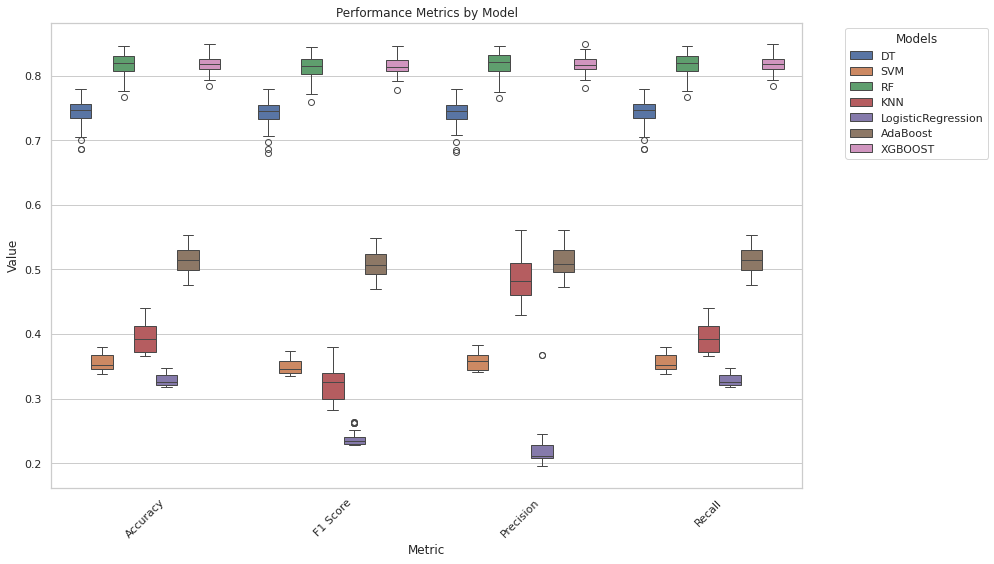

In [49]:
# Set the plot style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Metric', y='Value', hue='Model', data=melted_df)

# Add a title and labels
plt.title('Performance Metrics by Model')
plt.xlabel('Metric')
plt.ylabel('Value')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Display the legend
plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

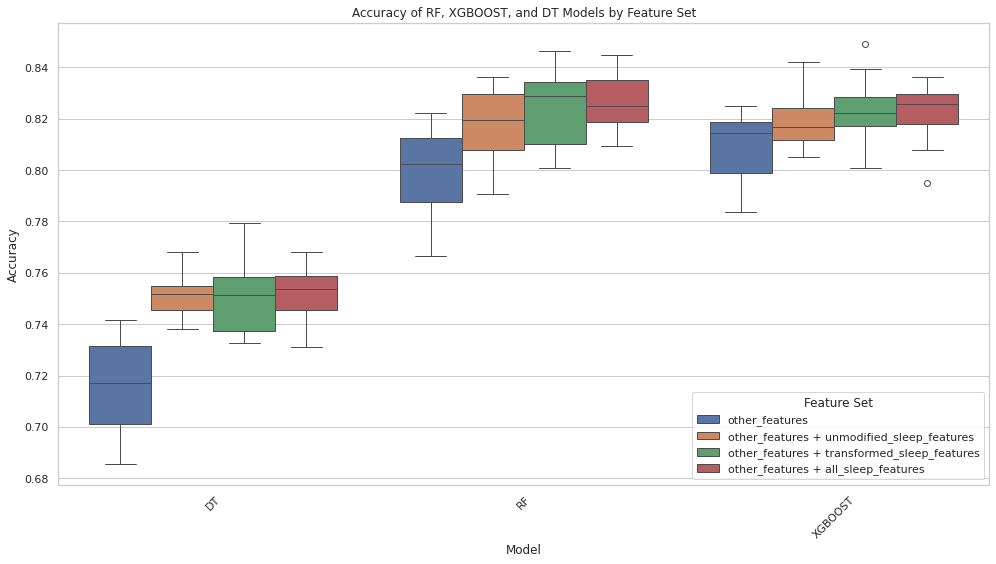

In [67]:
# Filter the DataFrame for the specified models
filtered_df = results_df[results_df['Model'].isin(['RF', 'XGBOOST', 'DT'])]

# Set the plot style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Model', y='Accuracy', hue='Feature Set', data=filtered_df)

# Add a title and labels
plt.title('Accuracy of RF, XGBOOST, and DT Models by Feature Set')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Display the legend
plt.legend(title='Feature Set', loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()

In [57]:
# Filter for Decision Tree model and the two feature sets
dt_filtered_df = results_df[
    (results_df['Model'] == 'DT') & 
    (results_df['Feature Set'].isin(['other_features', 'other_features + all_sleep_features']))
]

# Pivot the DataFrame to get accuracies for each fold and feature set
pivot_dt_df = dt_filtered_df.pivot_table(index='Fold', columns='Feature Set', values='Accuracy')

# Extract accuracies for each feature set
acc_other_features = pivot_dt_df['other_features']
acc_sleep_features = pivot_dt_df['other_features + all_sleep_features']

In [59]:
from scipy.stats import ttest_rel

# Ensure both lists are of the same length
assert len(acc_other_features) == len(acc_sleep_features), "The two feature sets must have the same number of folds."

# Perform paired t-test
t_stat, p_val = ttest_rel(acc_other_features, acc_sleep_features)

print(f'Paired t-test statistic: {t_stat:.4f}, p-value: {p_val:.4f}')

Paired t-test statistic: -6.2849, p-value: 0.0001


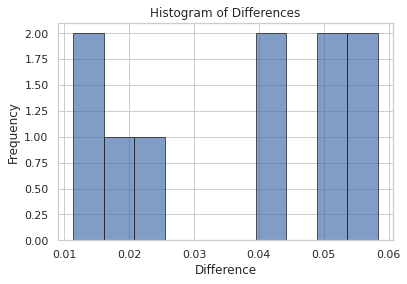

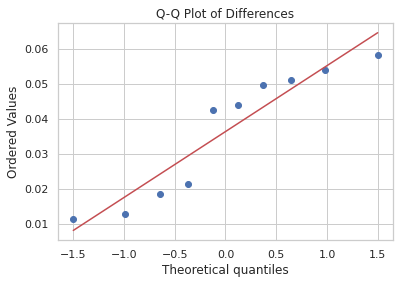

In [63]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate the differences between the two feature sets
differences = acc_sleep_features - acc_other_features

# Plot histogram
plt.hist(differences, bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram of Differences')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
stats.probplot(differences, dist="norm", plot=plt)
plt.title('Q-Q Plot of Differences')
plt.show()

In [64]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test
stat, p_val = shapiro(differences)
print(f'Shapiro-Wilk test statistic: {stat:.4f}, p-value: {p_val:.4f}')

if p_val < 0.05:
    print("Data is not normally distributed")
else:
    print("Data is normally distributed")

Shapiro-Wilk test statistic: 0.8637, p-value: 0.0843
Data is normally distributed


In [65]:
if p_val < 0.05:
    # Data is not normally distributed; use Wilcoxon test
    from scipy.stats import wilcoxon
    w_stat, p_val = wilcoxon(acc_other_features, acc_sleep_features)
    print(f'Wilcoxon signed-rank test statistic: {w_stat:.4f}, p-value: {p_val:.4f}')
else:
    # Data is normally distributed; use paired t-test
    from scipy.stats import ttest_rel
    t_stat, p_val = ttest_rel(acc_other_features, acc_sleep_features)
    print(f'Paired t-test statistic: {t_stat:.4f}, p-value: {p_val:.4f}')


Paired t-test statistic: -6.2849, p-value: 0.0001
